# Part 2: Decision Trees

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

First, load in the data, and drop all rows that have NaN values. Then create X and y
numpy arrays, where X is a matrix so that all of the rows are the different rows from the
dataframes and the columns are the features listed above, and y is the numpy array of the
Status column. Once you have completed this, X and y should both have 1649 rows.
The next step is to create a train test split on the data. We’re going to use a test size of
0.33 and a random state of 42.

In [49]:
# Read in CSV here
life_expectancy_data = pd.read_csv("Life Expectancy Data.csv")
life_expectancy_data = life_expectancy_data.dropna()

X = np.c_[life_expectancy_data["Hepatitis_B"], 
            life_expectancy_data["Polio"],
            life_expectancy_data["Measles"],
            life_expectancy_data["BMI"],
            life_expectancy_data["Diphtheria"],
            life_expectancy_data["HIV/AIDS"],
            life_expectancy_data["Adult_Mortality"]]

y = np.array(life_expectancy_data["Status"])

#Should print 1649
#print(len(X)) 
#print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Question 2.1 (10 points): What is the information gain if the split is on BMI < 50? Look
at slides from lecture on calculating information gain to use the correct formula

In [50]:
#Count parent developed and developing
parent_total_count = len(y_train)
parent_developed_count = np.count_nonzero(y_train == 'Developed')
parent_developing_count = parent_total_count - parent_developed_count
print("Parent Total Count: ", parent_total_count)
print("Parent Developed Count: ", parent_developed_count)
print("Parent Developing Count: ", parent_developing_count)
#Calculate entropy of parent
entropy_parent = -(parent_developed_count/parent_total_count) * math.log2(parent_developed_count/parent_total_count)
entropy_parent -= (parent_developing_count/parent_total_count) * math.log2(parent_developing_count/parent_total_count)
print("Entropy of Parent: ", entropy_parent)


#Split into children based off of BMI < 50
child1_indices = np.where(X_train[:, 3] < 50)
child2_indices = np.where(X_train[:, 3] >= 50)


# Calculate counts in child node 1
child1_total_count = len(child1_indices[0])
child1_developed_count = np.count_nonzero(y_train[child1_indices] == 'Developed')
child1_developing_count = child1_total_count - child1_developed_count
print("\nChild 1 Total Count: ", child1_total_count)
print("Child 1 Developed Count: ", child1_developed_count)
print("Child 1 Developing Count: ", child1_developing_count)
# Calculate entropy of child node 1
entropy_child1 = -(child1_developed_count/child1_total_count) * math.log2(child1_developed_count/child1_total_count) 
entropy_child1 -= (child1_developing_count/child1_total_count) * math.log2(child1_developing_count/child1_total_count)
print("Entropy of Parent: ", entropy_parent)


# Calculate counts in child node 2
child2_total_count = len(child2_indices[0])
child2_developed_count = np.count_nonzero(y_train[child2_indices] == 'Developed')
child2_developing_count = child2_total_count - child2_developed_count
print("\nChild 2 Total Count: ", child2_total_count)
print("Child 2 Developed Count: ", child2_developed_count)
print("Child 2 Developing Count: ", child2_developing_count)
# Calculate entropy of child node 2
entropy_child2 = -(child2_developed_count/child2_total_count) * math.log2(child2_developed_count/child2_total_count) 
entropy_child2 -= (child2_developing_count/child2_total_count) * math.log2(child2_developing_count/child2_total_count)


#Calculate weighted average entropy and information gain
weighted_average_entropy = (child1_total_count/parent_total_count) * entropy_child1 + (child2_total_count/parent_total_count) * entropy_child2
print("\nWeighted Average Entropy: ", weighted_average_entropy)
information_gain = entropy_parent - weighted_average_entropy
print("Information Gain: ", information_gain)

Parent Total Count:  1104
Parent Developed Count:  162
Parent Developing Count:  942
Entropy of Parent:  0.6016194553265831

Child 1 Total Count:  701
Child 1 Developed Count:  21
Child 1 Developing Count:  680
Entropy of Parent:  0.6016194553265831

Child 2 Total Count:  403
Child 2 Developed Count:  141
Child 2 Developing Count:  262

Weighted Average Entropy:  0.46422369963331955
Information Gain:  0.13739575569326357


Question 2.2 (10 points): Create a decision tree classifier with the entropy criterion and fit
to the training data. What is the accuracy score of this classifier on the testing set? What
is the first decision that is used to split the data (which feature does it use and what value
does it split on)?

Accuracy score on training set: 1.0
Accuracy score on testing set: 0.9027522935779817


|--- feature_3 <= 52.85
|   |--- feature_6 <= 92.50
|   |   |--- feature_5 <= 0.15
|   |   |   |--- feature_3 <= 9.90
|   |   |   |   |--- feature_0 <= 93.50
|   |   |   |   |   |--- feature_0 <= 90.00
|   |   |   |   |   |   |--- feature_4 <= 94.50
|   |   |   |   |   |   |   |--- feature_6 <= 85.00
|   |   |   |   |   |   |   |   |--- class: Developing
|   |   |   |   |   |   |   |--- feature_6 >  85.00
|   |   |   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |   |--- feature_4 >  94.50
|   |   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |--- feature_0 >  90.00
|   |   |   |   |   |   |--- class: Developing
|   |   |   |   |--- feature_0 >  93.50
|   |   |   |   |   |--- feature_0 <= 97.50
|   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |--- feature_0 >  97.50
|   |   |   |   |   |   |--- feature_2 <= 8.00
|   |   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |   |--- feature_2 >  8.00
|   |   |   |   |   |   |   |-

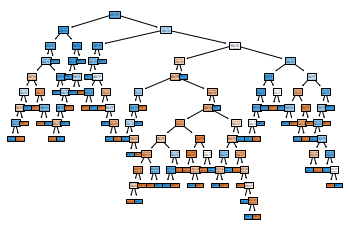

In [51]:
tree1 = tree.DecisionTreeClassifier(criterion="entropy")
tree1.fit(X_train, y_train)
y_predict = tree1.predict(X_train)
print("Accuracy score on training set: " + str(accuracy_score(y_train, y_predict)))
y_predict = tree1.predict(X_test)
print("Accuracy score on testing set: " + str(accuracy_score(y_test, y_predict)))

tree.plot_tree(tree1, filled=True)
print(tree.export_text(tree1))
#plt.savefig('testfig.svg', format='svg')

Question 2.3 (10 points): Create decision trees with max depths from 2 to 20 and calculate
the training and testing accuracy for each decision tree and display in a table. Which one is
best? Provide a short (1-2 sentence) explanation for why that depth is the best performing.

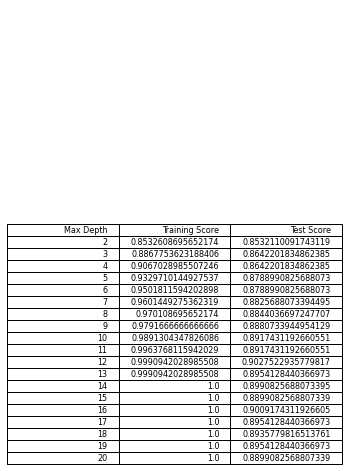

In [52]:
old_y_predict = 0
table_info = [["Max Depth", "Training Score", "Test Score"]]

for depth in range(2, 21):
    tree2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    tree2.fit(X_train, y_train)
    y_predict = tree2.predict(X_train)
    old_y_predict = y_predict
    y_predict = tree2.predict(X_test)
    table_info.append([depth, accuracy_score(y_train, old_y_predict), accuracy_score(y_test, y_predict)])

#Trying to hide the graph and only show a table
plt.axis('off')
plt.table(table_info)
plt.show()

Question 2.4 (5 points): Show the diagram of the decision three with max depth of 2.

|--- feature_3 <= 52.85
|   |--- feature_6 <= 92.50
|   |   |--- class: Developing
|   |--- feature_6 >  92.50
|   |   |--- class: Developing
|--- feature_3 >  52.85
|   |--- feature_4 <= 91.50
|   |   |--- class: Developing
|   |--- feature_4 >  91.50
|   |   |--- class: Developing



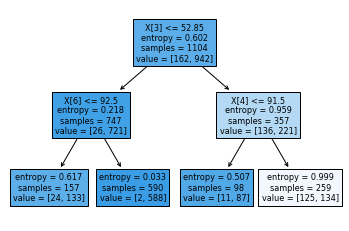

In [53]:
tree3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
tree3.fit(X_train, y_train)
y_predict = tree3.predict(X_train)
y_predict = tree3.predict(X_test)
tree.plot_tree(tree3, filled=True)
print(tree.export_text(tree3))


Question 2.5 (5 points): For the best performing tree in Question 2.3 (in terms of testing
results), show the confusion matrices that are produced for the training set and testing set.

In [54]:
tree4 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=19)
tree4.fit(X_train, y_train)
y_predict = tree4.predict(X_train)
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, tree4.predict(X_train)))

y_predict = tree4.predict(X_test)
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, tree4.predict(X_test)))


Training Confusion Matrix:
[[162   0]
 [  0 942]]
Test Confusion Matrix:
[[ 50  30]
 [ 25 440]]


Question 2.6 (15 points): Create two additional decision trees, where min samples leaf set
is set to 10 and min samples split set to 2 and a second where min samples leaf set is set
to 10 and min samples split set to 30. Calculate the training and testing scores for each.
Which of these performs better? Provide a short explanation (2-3 sentences) for why one
performs better than the other.

In [55]:
tree5 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10, min_samples_split=2)
tree6 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10, min_samples_split=30)
tree5.fit(X_train, y_train)
tree6.fit(X_train, y_train)

print("2 min sample split")
y_predict = tree5.predict(X_train)
print("Accuracy score on training set:", accuracy_score(y_train, y_predict))
y_predict = tree5.predict(X_test)
print("Accuracy score on testing set:", accuracy_score(y_test, y_predict))

print("\n30 min sample split")
y_predict = tree6.predict(X_train)
print("Accuracy score on training set:", accuracy_score(y_train, y_predict))
y_predict = tree6.predict(X_test)
print("Accuracy score on testing set:", accuracy_score(y_test, y_predict))

2 min sample split
Accuracy score on training set: 0.9384057971014492
Accuracy score on testing set: 0.8807339449541285

30 min sample split
Accuracy score on training set: 0.9329710144927537
Accuracy score on testing set: 0.8770642201834863
